# Example workflow using .mat data

This notebook details an example workflow using SpikeStability package. .mat files here are the output of waveclus software, hence they include extracted waveforms, timestamps and a cluster label. We can disregard the cluster label if we wish to perform our own clustering/spike sorting.

All the data analysis pipeline is performed per mouse at first. Results files can be exported and concatenated to do across-mice data analysis.

**Important: The current output of the cells is what it looks like if you run with all data and it reproduces paper figures. The data is too large to share on github and will be shared upon reasonable request submitted to the corresponding author of the manuscript.**

## Processing and creating a unified dataframe with all necessary information

### Import data

**Using .mat data with files separated by folders each containing an individual channel's recording over the different timepoints**

We are working here with data separated channel by channel because of the geometry of the novel brain-machine interface electrodes developped for our study. Indeed, these are far enough apart that, unlike a tetrode recording, we can be sure that no neuron is being recorded on two separate channels. This means clustering (spike sorting) can be performed on a channel by channel basis.




In [1]:
import os
os.chdir('..')
os.getcwd()

'/home/sebastian/Documents/Harvard/BMI/project_consistency/spike_stability'

In [2]:
import numpy as np
import pandas as pd

In [3]:
from spike_stability.import_data.matlab import mat_data_all_channels
from spike_stability.import_data.colors import color_dict
from spike_stability.util.colors import color_dict_list

In general, make sure you have changed all paths to your specific configuration. Additionally, make sure you have the data in the correct format and the color file at colors_path with the correct format. Data is organized by channel here (CH13/times_CH13_1.mat, ...), if you wish to import data organized differently (e.g. 073020/times_CH13.mat - with all channel files together but separated per recording data or timepoint) you will have to refer to the importing_data.ipynb notebook in the examples/ folder of this package). The importing cells might therefore change slightly depending on your use-case, but the downstream analysis is very similar given you have imported and formatted the data.

In [4]:
#import color related dict
#colors
colors_path = './data/color_code.txt'
all_color_dics = color_dict(colors_path)
cluster_colors_all = color_dict_list(all_color_dics, 'mouse1', 'waveclus')

Adding color dic associated to channel13mouse1 & waveclus to dict
Adding color dic associated to channel21mouse1 & waveclus to dict
Adding color dic associated to channel9mouse1 & waveclus to dict
Adding color dic associated to channel17mouse1 & waveclus to dict


In [5]:
all_color_dics

{'channel13mouse1': {'waveclus': {'1': '#ff0000',
   '2': '#08ff00',
   '3': '#00fff6',
   '4': '#0010ff'},
  'wavemap_all': {'0': '#ff0000', '1': '#fcf500', '2': '#08ff00'},
  'wavemap_day': {'0': '#a1c9f4',
   '1': '#ffb482',
   '2': '#8de5a1',
   '3': '#ff9f9b',
   '4': '#acbdb0'},
  'param_umap': {'0': '#1f77b4', '1': '#ff7f0e', '2': '#FFD700'},
  'wavemap_other': {'0': '#FF1493', '1': '#4169E1', '2': '#daa520'}},
 'channel21mouse1': {'waveclus': {'1': '#4169e1',
   '2': '#ffd700',
   '3': '#ee82ee',
   '4': '#808000'},
  'wavemap_all': {'0': '#00ced1', '1': '#ffa500'},
  'wavemap_day': {'0': '#d0bbff', '1': '#debb9b'},
  'param_umap': {'0': '#d62728', '1': '#9467bd'},
  'wavemap_other': {'0': '#BA55D3', '1': '#008080'}},
 'channel9mouse1': {'waveclus': {'1': '#f4a460',
   '2': '#00bfff',
   '3': '#8b008b'},
  'wavemap_all': {'0': '#b22222', '1': '#4682b4'},
  'wavemap_day': {'0': '#fab0e4', '1': '#cfcfcf'},
  'param_umap': {'0': '#8c564b', '1': '#e377c2'},
  'wavemap_other': {'0':

Processing channel CH13 

Extracted data from times_CH13_1.mat recorded on month 1
There are 4 clusters in this file.
Extracted data from times_CH13_2.mat recorded on month 2
There are 4 clusters in this file.
Extracted data from times_CH13_3.mat recorded on month 3
There are 4 clusters in this file.
Extracted data from times_CH13_4.mat recorded on month 4
There are 4 clusters in this file.
Extracted data from times_CH13_5.mat recorded on month 5
There are 4 clusters in this file.
Extracted data from times_CH13_6.mat recorded on month 6
There are 4 clusters in this file.
Extracted data from times_CH13_7.mat recorded on month 7
There are 4 clusters in this file.
Extracted data from times_CH13_8.mat recorded on month 8
There are 4 clusters in this file.
Extracted data from times_CH13_9.mat recorded on month 9
There are 4 clusters in this file.
Extracted data from times_CH13_10.mat recorded on month 10
There are 4 clusters in this file.
Extracted data from times_CH13_11.mat recorded on mo

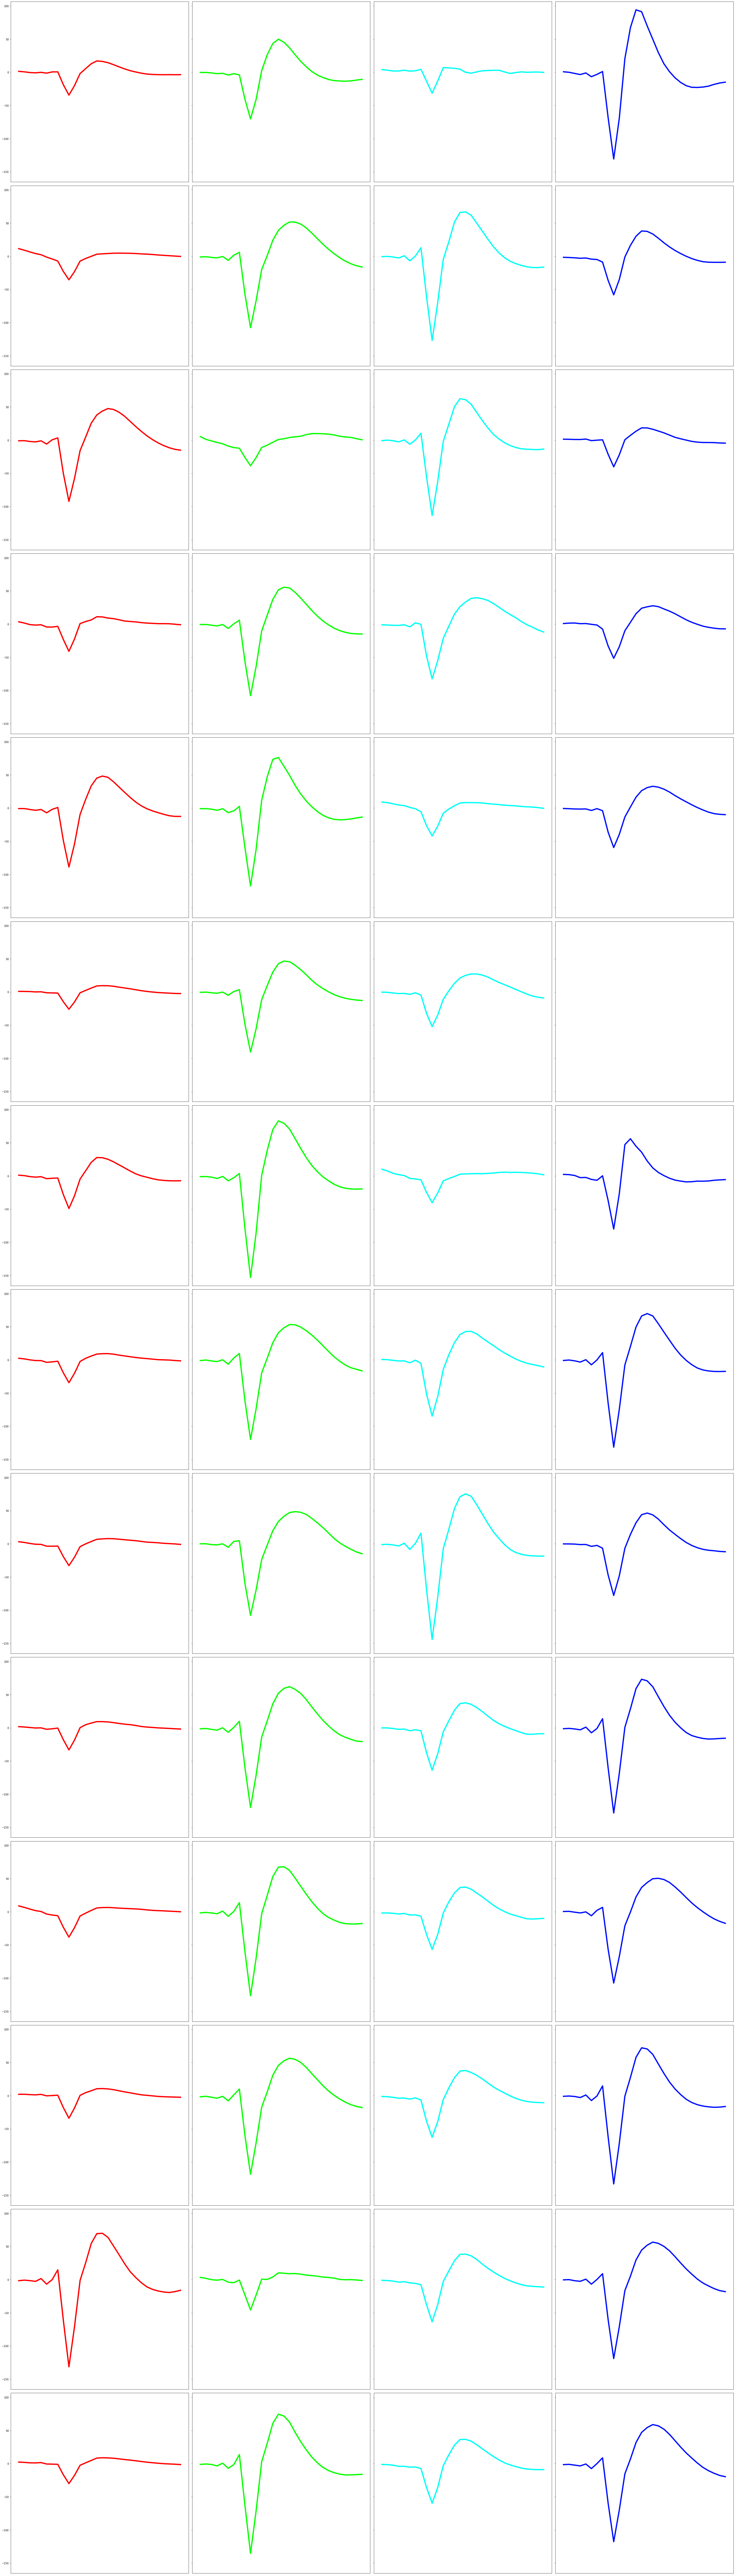

Processing channel CH21 

Extracted data from times_CH21_1.mat recorded on month 1
There are 2 clusters in this file.
Extracted data from times_CH21_2.mat recorded on month 2
There are 2 clusters in this file.
Extracted data from times_CH21_3.mat recorded on month 3
There are 2 clusters in this file.
Extracted data from times_CH21_4.mat recorded on month 4
There are 2 clusters in this file.
Extracted data from times_CH21_5.mat recorded on month 5
There are 2 clusters in this file.
Extracted data from times_CH21_6.mat recorded on month 6
There are 2 clusters in this file.
Extracted data from times_CH21_7.mat recorded on month 7
There are 2 clusters in this file.
Extracted data from times_CH21_8.mat recorded on month 8
There are 2 clusters in this file.
Extracted data from times_CH21_9.mat recorded on month 9
There are 2 clusters in this file.
Extracted data from times_CH21_10.mat recorded on month 10
There are 2 clusters in this file.
Extracted data from times_CH21_11.mat recorded on mo

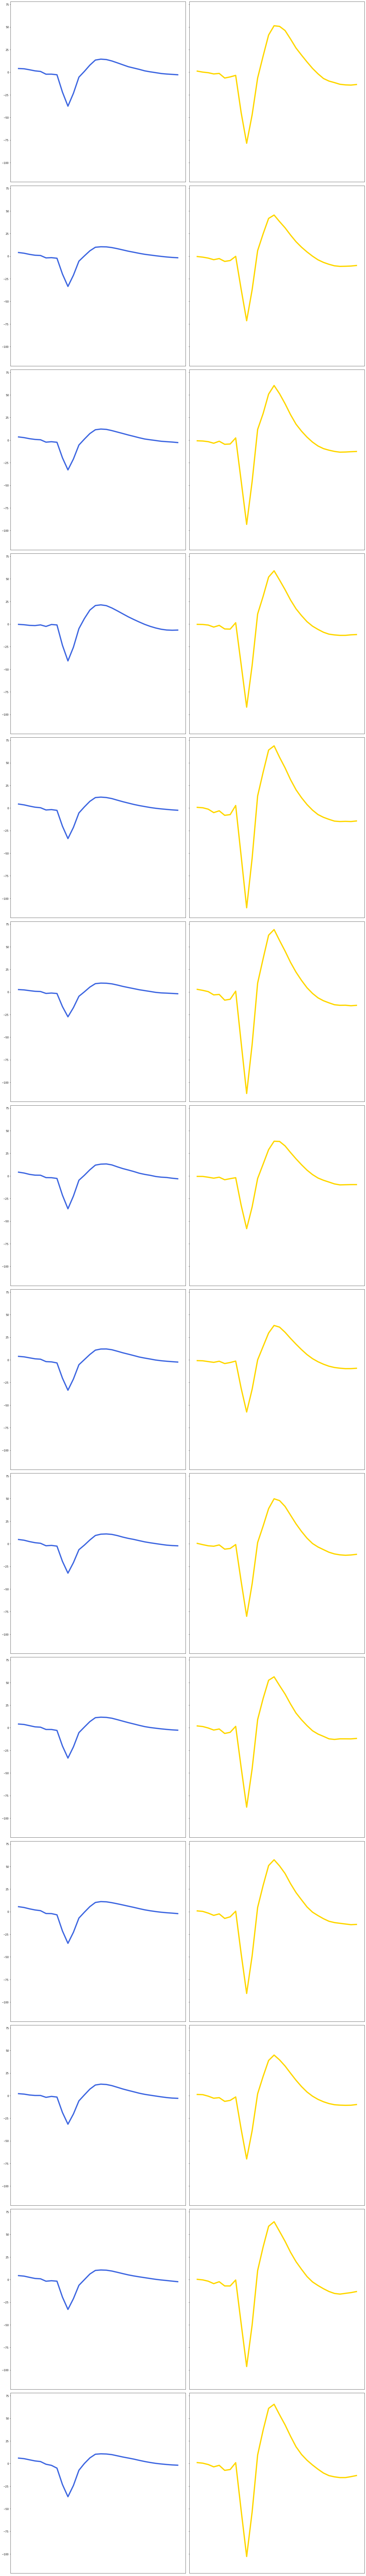

Processing channel CH9 

Extracted data from times_CH9_1.mat recorded on month 1
There are 2 clusters in this file.
Extracted data from times_CH9_2.mat recorded on month 2
There are 2 clusters in this file.
Extracted data from times_CH9_3.mat recorded on month 3
There are 2 clusters in this file.
Extracted data from times_CH9_4.mat recorded on month 4
There are 2 clusters in this file.
Extracted data from times_CH9_5.mat recorded on month 5
There are 2 clusters in this file.
Extracted data from times_CH9_6.mat recorded on month 6
There are 2 clusters in this file.
Extracted data from times_CH9_7.mat recorded on month 7
There are 2 clusters in this file.
Extracted data from times_CH9_8.mat recorded on month 8
There are 2 clusters in this file.
Extracted data from times_CH9_9.mat recorded on month 9
There are 2 clusters in this file.
Extracted data from times_CH9_10.mat recorded on month 10
There are 2 clusters in this file.
Extracted data from times_CH9_11.mat recorded on month 11
There

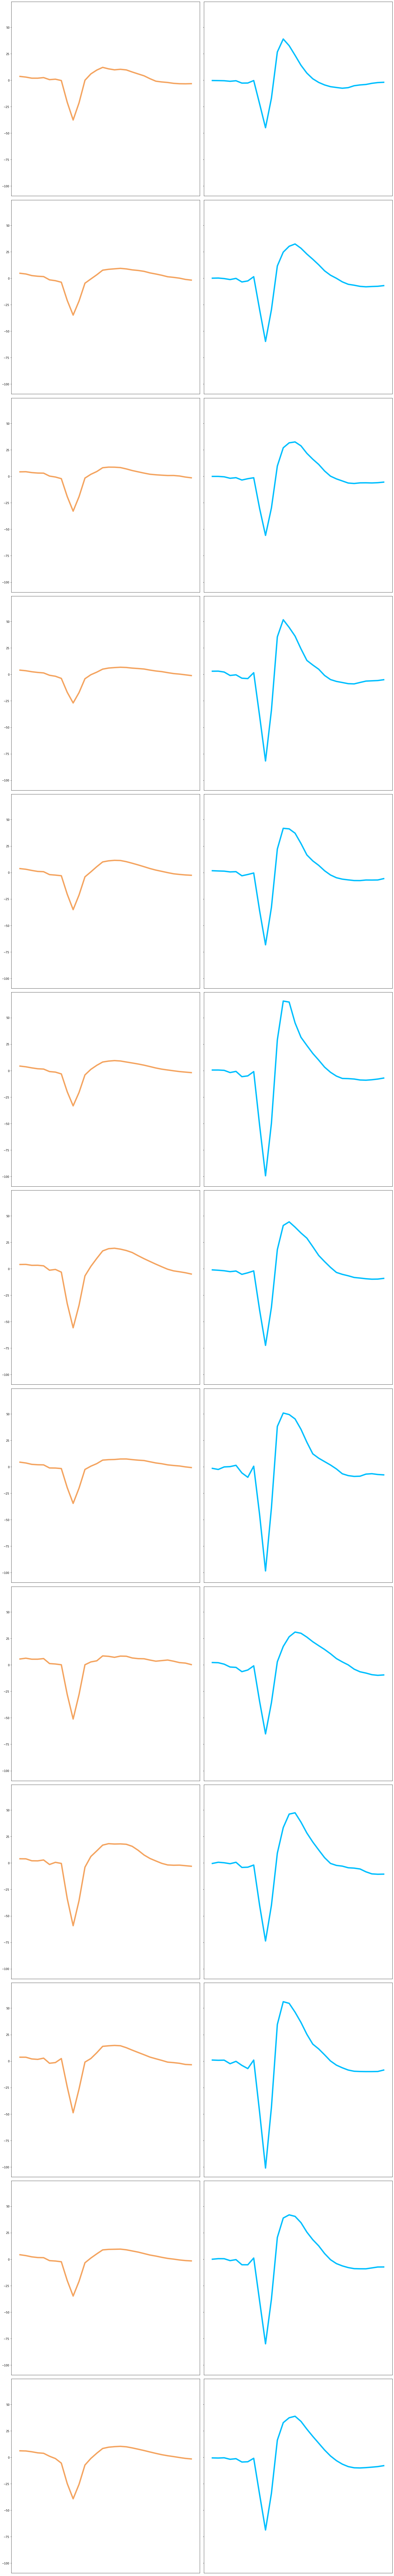

Processing channel CH17 

Extracted data from times_CH17_1.mat recorded on month 1
There are 2 clusters in this file.
Extracted data from times_CH17_2.mat recorded on month 2
There are 2 clusters in this file.
Extracted data from times_CH17_3.mat recorded on month 3
There are 2 clusters in this file.
Extracted data from times_CH17_4.mat recorded on month 4
There are 2 clusters in this file.
Extracted data from times_CH17_5.mat recorded on month 5
There are 2 clusters in this file.
Extracted data from times_CH17_6.mat recorded on month 6
There are 2 clusters in this file.
Extracted data from times_CH17_7.mat recorded on month 7
There are 2 clusters in this file.
Extracted data from times_CH17_8.mat recorded on month 8
There are 2 clusters in this file.
Extracted data from times_CH17_9.mat recorded on month 9
There are 2 clusters in this file.
Extracted data from times_CH17_10.mat recorded on month 10
There are 2 clusters in this file.
Extracted data from times_CH17_11.mat recorded on mo

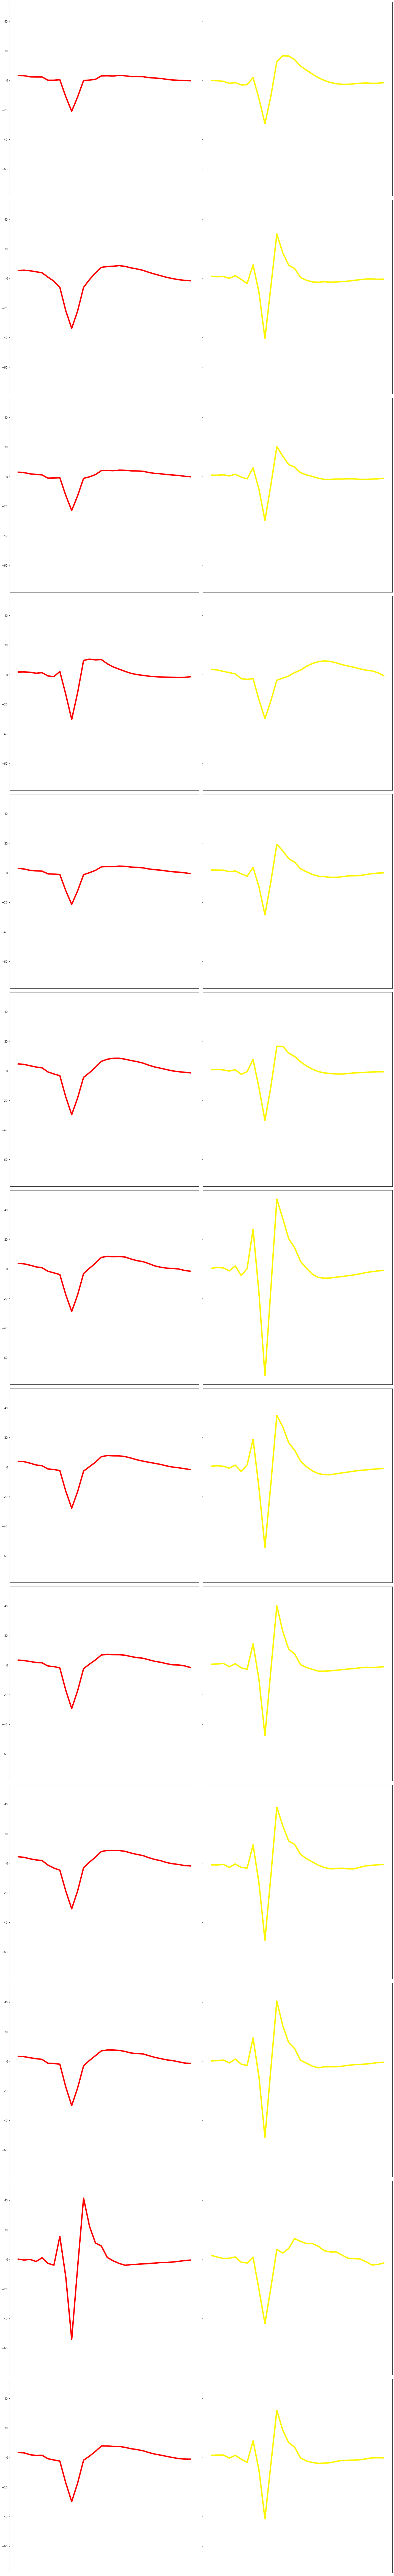

In [6]:
#relevant path params
data_basepath = '/media/sebastian/Samsung_T5/Harvard/BMI/data/mouse1/mat/' #don't forget the last /

channel_paths = ['CH13',
                 'CH21',
                 'CH9',
                 'CH17']

#for importing matlab data
exclude_clusters = [[0] for _ in range(4)] #if you wish to not load a certain cluster label

prefix = ['times_CH13',
          'times_CH21',
          'times_CH9',
          'times_CH17']

file_format = '.mat'

channel_reg_expression = 'CH(\d+?)_'
date_reg_expression = '_(\d+?).mat'

spikes_key='spikes'
clusters_timestamps_key='cluster_class'

verbose = 1

#getting data
spikes, channels, timestamps, dates, clusters = mat_data_all_channels(data_basepath,
                                                                      channel_paths,
                                                                      cluster_colors_all,
                                                                      prefix_channel=prefix,
                                                                      file_format=file_format,
                                                                      exclude_clusters_channel=exclude_clusters,
                                                                      verbose=verbose,
                                                                      channel_reg_expression=channel_reg_expression,
                                                                      date_reg_expression=date_reg_expression,
                                                                      spikes_key=spikes_key,
                                                                      clusters_timestamps_key=clusters_timestamps_key)

In [7]:
spikes.shape, channels.shape, timestamps.shape, dates.shape, clusters.shape

((289247, 30), (289247,), (289247,), (289247,), (289247,))

In [8]:
spike_cols = ['t'+str(i) for i in range(1, spikes.shape[1]+1)]

In [9]:
channel_key = 'channel'
date_key = 'date'
cluster_key = 'cluster_waveclus'
timestamps_key = 'timestamps'
mouse = 1

In [10]:
df = pd.DataFrame(spikes, columns=spike_cols)
df[channel_key] = channels
df[date_key] = dates
df[cluster_key] = clusters
df[timestamps_key] = timestamps
df['mouse'] = mouse

### Minor preprocessing

Some basic preprocessing can be performed with the package. You can decide to remove artefacts (spikes with minimum or maximum values above a certain threshold). The threshold should be set in the same units as the spike values. You may also want to keep only those spikes whose peak falls at the correct timepoint. Digging into the package, you will find some other functionalities such as removing consecutive spikes with the same neuron label whose timestamps falls under a threshold. All functions of the package try to return a modified dataframe.

In [11]:
from spike_stability.preprocessing.waveform import remove_artefacts, ensure_spike_alignment

In [12]:
df = remove_artefacts(df, spike_cols=spike_cols, threshold=200, mode="min")

In [13]:
df

t1         t2         t3         t4         t5         t6  \
0       -1.733272   1.924401   4.864007   8.273553   4.338887  -6.831112   
1        2.552666   2.613197   1.141287  -6.196541  -5.883912   0.193642   
2       32.778542  25.525538  22.879803  17.501375  10.686896   5.051466   
3        0.252758  -3.433641  -1.652832   2.026858  -7.877391 -17.573156   
4      -18.252741  -5.485834   6.458279   7.466223  -0.604985  -0.164291   
...           ...        ...        ...        ...        ...        ...   
289242   5.508423  11.959299   7.800596   0.435493  -1.666602  -7.804980   
289243  16.789551  18.727508  18.786404  10.504162   4.016306   7.044452   
289244  15.644455   0.773332  -3.118377   3.241931  -2.906149 -15.234124   
289245  12.454030   7.743405  -1.302088  -0.358546   4.460125  -3.213704   
289246   1.721910  -0.249912  -1.197742   4.159724   4.456056  -1.525355   

               t7         t8         t9        t10  ...        t26        t27  \
0       -2.560505   2.265862 -17.430875 -31.019810  ...  -7.775905  -3.283850   
1       -0.184367  -1.855290 -14.461954 -24.929593  ...  -1.918586  -7.577192   
2       -0.790786  -4.318344 -26.180289 -44.136423  ... -15.624182 -14.440670   
3      -19.115118 -20.434914 -23.933957 -29.415811  ...  -1.038400  -3.165743   
4        4.406912  -3.974562 -17.415895 -24.733646  ... -15.755359 -12.886922   
...           ...        ...        ...        ...  ...        ...        ...   
289242  -8.061829  -0.658896 -23.015715 -49.198473  ... -10.573413  -4.467651   
289243   7.539226   2.735980  -7.901344 -18.284903  ...  -3.663406   5.508862   
289244  -8.591207   4.469301 -14.440465 -33.533740  ...  -4.383311  -1.320321   
289245  -8.092134   1.692686 -15.706256 -34.616716  ... -24.293278 -16.102908   
289246   2.924928  12.286981  -2.470012 -20.563928  ...  -0.243417  -6.765834   

              t28       t29        t30  channel  date  cluster_waveclus  \
0       -1.120829 -3.836123  -0.427155       13     1               1.0   
1       -3.936889 -5.730392 -11.573520       13     1               1.0   
2       -8.324624 -2.555112   1.277489       13     1               1.0   
3      -12.953710 -8.927546  -1.450964       13     1               1.0   
4      -11.221151 -6.615209  -2.922284       13     1               1.0   
...           ...       ...        ...      ...   ...               ...   
289242  -4.115439 -7.166646  -5.333624       17    13               2.0   
289243  10.215130  4.058474   1.358634       17    13               2.0   
289244   1.674148  6.640637  13.830386       17    13               2.0   
289245  -9.444976 -6.263909   0.625307       17    13               2.0   
289246 -11.132361 -6.571955  -4.401345       17    13               2.0   

        timestamps  mouse  
0             64.7      1  
1             79.4      1  
2             84.6      1  
3             87.7      1  
4             96.4      1  
...            ...    ...  
289242    358197.2      1  
289243    358343.2      1  
289244    358452.7      1  
289245    358477.9      1  
289246    359894.9      1  

[289235 rows x 35 columns]

Keeping only spikes with peak positions in positions: [9]


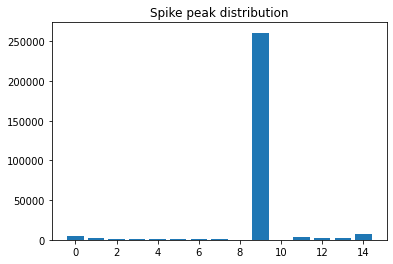

In [14]:
df = ensure_spike_alignment(df, spike_cols=spike_cols, nb_values_keep=1, mode='min', plot=True)

### Align waveclus labels 

Waveclus labels do not match from one day to the next. That is, the same neuron may be labeled as 1 on timepoint 1 and 3 on timepoint 2. This means we need to either manually align the labels or do so automatically. Here, we use a basic optimization strategy to pick a pairing minimizing the mse between average neuron waveforms between a given timepoint and a template day. You can either pick the template day or choose it automatically. Choosing it automatically is done using the build_alignment_dic function which picks the first day of for each channel for which all neurons were seen. This is done to not drop any neurons along the way and so that you, the user, may choose which neuron labels to drop (e.g. if a specific neuron only appears on the last timepoint it is most likely noise or an erroneous output from waveclus).

In [15]:
from spike_stability.import_data.matlab import build_alignment_dic, align_labels

In [16]:
from spike_stability.stability.waveforms import all_channel_waveforms_overtime

In [17]:
template_alignment_dic = build_alignment_dic(df, channel_key, date_key, cluster_key)

In [18]:
template_alignment_dic

{'13': '1', '17': '1', '21': '1', '9': '1'}

In [19]:
#align labels
df = align_labels(df,
                  spike_cols,
                  cluster_key,
                  channel_key,
                  date_key,
                  template_alignment_dic)

Optimal match found for day 1: {1: 1, 2: 2, 3: 3, 4: 4}, channel 13
Optimal match found for day 2: {1: 1, 4: 2, 3: 3, 2: 4}, channel 13
Optimal match found for day 3: {3: 1, 2: 2, 1: 3, 4: 4}, channel 13
Optimal match found for day 4: {2: 1, 4: 2, 1: 3, 3: 4}, channel 13
Optimal match found for day 5: {3: 1, 2: 2, 1: 3, 4: 4}, channel 13
Optimal match found for day 6: {3: 1, 4: 2, 1: 3, 2: 4}, channel 13
Optimal match found for day 7: {3: 1, 2: 2, 1: 3, 4: 4}, channel 13
Optimal match found for day 8: {3: 1, 4: 2, 2: 3, 1: 4}, channel 13
Optimal match found for day 9: {3: 1, 4: 2, 1: 3, 2: 4}, channel 13
Optimal match found for day 10: {4: 1, 2: 2, 1: 3, 3: 4}, channel 13
Optimal match found for day 11: {4: 1, 1: 2, 2: 3, 3: 4}, channel 13
Optimal match found for day 12: {4: 1, 3: 2, 1: 3, 2: 4}, channel 13
Optimal match found for day 13: {4: 1, 1: 2, 3: 3, 2: 4}, channel 13
Optimal match found for day 14: {3: 1, 2: 2, 1: 3}, channel 13
Optimal match found for day 1: {1: 1, 2: 2}, chan

In [20]:
df

t1         t2         t3         t4         t5         t6  \
0       -1.733272   1.924401   4.864007   8.273553   4.338887  -6.831112   
1        2.552666   2.613197   1.141287  -6.196541  -5.883912   0.193642   
2       32.778542  25.525538  22.879803  17.501375  10.686896   5.051466   
4      -18.252741  -5.485834   6.458279   7.466223  -0.604985  -0.164291   
5       -2.844050   2.604510   5.219517   4.038081   4.708772   8.271916   
...           ...        ...        ...        ...        ...        ...   
289239   1.533174  -4.835116  -7.066773  -3.568719  -9.114205  -9.878501   
289241   2.203859  -0.389291  -4.836382  -6.210436  -4.123286  -5.362608   
289242   5.508423  11.959299   7.800596   0.435493  -1.666602  -7.804980   
289244  15.644455   0.773332  -3.118377   3.241931  -2.906149 -15.234124   
289245  12.454030   7.743405  -1.302088  -0.358546   4.460125  -3.213704   

              t7         t8         t9        t10  ...        t26        t27  \
0      -2.560505   2.265862 -17.430875 -31.019810  ...  -7.775905  -3.283850   
1      -0.184367  -1.855290 -14.461954 -24.929593  ...  -1.918586  -7.577192   
2      -0.790786  -4.318344 -26.180289 -44.136423  ... -15.624182 -14.440670   
4       4.406912  -3.974562 -17.415895 -24.733646  ... -15.755359 -12.886922   
5       1.732951 -12.003111 -23.848864 -36.006838  ... -11.662414  -1.114947   
...          ...        ...        ...        ...  ...        ...        ...   
289239 -1.650388   9.352839  -9.415857 -32.196999  ...  -3.536500  -0.561901   
289241 -3.813195   4.032879  -6.736310 -21.389276  ...  -0.653898  -9.144934   
289242 -8.061829  -0.658896 -23.015715 -49.198473  ... -10.573413  -4.467651   
289244 -8.591207   4.469301 -14.440465 -33.533740  ...  -4.383311  -1.320321   
289245 -8.092134   1.692686 -15.706256 -34.616716  ... -24.293278 -16.102908   

              t28       t29        t30  channel  date  cluster_waveclus  \
0       -1.120829 -3.836123  -0.427155       13     1                 1   
1       -3.936889 -5.730392 -11.573520       13     1                 1   
2       -8.324624 -2.555112   1.277489       13     1                 1   
4      -11.221151 -6.615209  -2.922284       13     1                 1   
5        3.674908 -0.239552 -14.369588       13     1                 1   
...           ...       ...        ...      ...   ...               ...   
289239  -3.160668 -7.399940 -10.910701       17    13                 2   
289241  -8.368164  0.882063   9.306489       17    13                 2   
289242  -4.115439 -7.166646  -5.333624       17    13                 2   
289244   1.674148  6.640637  13.830386       17    13                 2   
289245  -9.444976 -6.263909   0.625307       17    13                 2   

        timestamps  mouse  
0             64.7      1  
1             79.4      1  
2             84.6      1  
4             96.4      1  
5            110.7      1  
...            ...    ...  
289239    358111.2      1  
289241    358136.6      1  
289242    358197.2      1  
289244    358452.7      1  
289245    358477.9      1  

[260746 rows x 35 columns]

### Perform wavemap clustering

If you wish to perform wavemap clustering for neuron identification here are some functions that should allow you to do so easily. Leiden clustering is done on per-channel & per-timepoint UMAP representations of single-unit action potential waveforms. You can also calculate the overall per-channel UMAP representation should you wish to perform over time visualizations of stability. The number of clusters to define per channel can be given manually or selected automatically (by passing automatic_cluster_nb=True as an argument). Cluster labels are aligned automatically.

(**Note:** depending on your available hardware this might take a little time to run given the amount of computation required for these multiple runs of UMAP over tens/hundreds of thousands of spikes).

In [22]:
from spike_stability.cluster.wavemap import wavemap

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [23]:
cluster_colors_wavemap = color_dict_list(all_color_dics, 'mouse1', 'wavemap_other')

Adding color dic associated to channel13mouse1 & wavemap_other to dict
Adding color dic associated to channel21mouse1 & wavemap_other to dict
Adding color dic associated to channel9mouse1 & wavemap_other to dict
Adding color dic associated to channel17mouse1 & wavemap_other to dict


In [24]:
#useful params for wavemap
nb_clust_channel = {'13': 3, '21': 2, '17': 2, '9': 2}
align_day_channel = template_alignment_dic
umap_params={'n_neighbors': 20, 'random_state': 1, 'min_dist': 0.1, 'n_components': 2, 'metric': 'euclidean'}

#this might take a little time to run
df = wavemap(df, 
           spike_cols,
           date_key,
           channel_key,
           new_coordinates_key=['UMAP1_day', 'UMAP2_day'],
           new_cluster_labels_key='cluster_wavemap',
           cluster_colors_channel=cluster_colors_wavemap,
           nb_clust_channel=nb_clust_channel, 
           align_day_channel=align_day_channel,
           umap_params=umap_params,
           plot=False)

In [25]:
df #note the added columns to the dataframe

t1         t2         t3         t4         t5         t6  \
0       -1.733272   1.924401   4.864007   8.273553   4.338887  -6.831112   
1        2.552666   2.613197   1.141287  -6.196541  -5.883912   0.193642   
2       32.778542  25.525538  22.879803  17.501375  10.686896   5.051466   
4      -18.252741  -5.485834   6.458279   7.466223  -0.604985  -0.164291   
5       -2.844050   2.604510   5.219517   4.038081   4.708772   8.271916   
...           ...        ...        ...        ...        ...        ...   
289239   1.533174  -4.835116  -7.066773  -3.568719  -9.114205  -9.878501   
289241   2.203859  -0.389291  -4.836382  -6.210436  -4.123286  -5.362608   
289242   5.508423  11.959299   7.800596   0.435493  -1.666602  -7.804980   
289244  15.644455   0.773332  -3.118377   3.241931  -2.906149 -15.234124   
289245  12.454030   7.743405  -1.302088  -0.358546   4.460125  -3.213704   

              t7         t8         t9        t10  ...       t29        t30  \
0      -2.560505   2.265862 -17.430875 -31.019810  ... -3.836123  -0.427155   
1      -0.184367  -1.855290 -14.461954 -24.929593  ... -5.730392 -11.573520   
2      -0.790786  -4.318344 -26.180289 -44.136423  ... -2.555112   1.277489   
4       4.406912  -3.974562 -17.415895 -24.733646  ... -6.615209  -2.922284   
5       1.732951 -12.003111 -23.848864 -36.006838  ... -0.239552 -14.369588   
...          ...        ...        ...        ...  ...       ...        ...   
289239 -1.650388   9.352839  -9.415857 -32.196999  ... -7.399940 -10.910701   
289241 -3.813195   4.032879  -6.736310 -21.389276  ...  0.882063   9.306489   
289242 -8.061829  -0.658896 -23.015715 -49.198473  ... -7.166646  -5.333624   
289244 -8.591207   4.469301 -14.440465 -33.533740  ...  6.640637  13.830386   
289245 -8.092134   1.692686 -15.706256 -34.616716  ... -6.263909   0.625307   

        channel  date  cluster_waveclus  timestamps  mouse  UMAP1_day  \
0            13     1                 1        64.7      1  -0.390693   
1            13     1                 1        79.4      1  -0.301629   
2            13     1                 1        84.6      1   0.921113   
4            13     1                 1        96.4      1   0.979385   
5            13     1                 1       110.7      1  -0.446626   
...         ...   ...               ...         ...    ...        ...   
289239       17    13                 2    358111.2      1   4.347016   
289241       17    13                 2    358136.6      1   4.112991   
289242       17    13                 2    358197.2      1   5.339103   
289244       17    13                 2    358452.7      1   5.112546   
289245       17    13                 2    358477.9      1   3.904556   

        UMAP2_day  cluster_wavemap  
0        6.114004                0  
1        6.543363                0  
2        6.387898                0  
4        6.638134                0  
5        7.609752                0  
...           ...              ...  
289239   1.031148                1  
289241   1.852298                1  
289242   2.356556                1  
289244   0.325845                0  
289245   1.967252                1  

[260746 rows x 38 columns]

In [26]:
#after performing such an expensive computation now is a good time to save
df.to_csv('./data/spike_dataset_example.csv', index=False)

In [27]:
df = pd.read_csv('./data/spike_dataset_example.csv')

### Create unique neuron labels for each clustering method

Cluster labels are assigned per channel, meaning a given mouse does not (for now) have a unique identifier for each neuron as these overlap between channels (e.g. CH1 has neuron cluster labels 1 and 2 while CH2 has neuron cluster labels 1, 2 and 3). This means we need to add an additional column in the dataframe with a unique identifier for each neuron. We have one less neuron for wavemap which is normal given our chosen number of clusters per channel in the previous step. 

In [29]:
from spike_stability.util.dataset import add_neuron_label

In [30]:
df = add_neuron_label(df, 'cluster_waveclus', channel_key, 'neuron_waveclus')

In [31]:
df['cluster_waveclus'].unique(), df['neuron_waveclus'].unique()

(array([1, 2, 3, 4]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [32]:
df = add_neuron_label(df, 'cluster_wavemap', channel_key, 'neuron_wavemap')

In [33]:
df['cluster_wavemap'].unique(), df['neuron_wavemap'].unique()

(array([0, 1, 2]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

### Remove incorrectly identified neurons, correct potentitial cluster definition issues

In this section we can manually correct some missidentified neurons, and correct potential misslabeling of neuron clusters. This analysis should be done by *carefully* checking the raw waveforms to correct potential misshaps of the spike sorting method of choice. Every effort should be made to make sure the discarded neurons are most likely noise and do not represent real signal, or else we might be losing valuable signal for downstream analysis.

**Note: you should have two sets of labels for every spike sorting methods, one per-channel and one overall (neuron). Removing certain labels, renumbering the other, switching some around should be done to both the sets of labels simulatenously if possible**

In [34]:
df['neuron_wavemap'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [35]:
#given waveforms remove cluster 1 for wavemap
df = df.loc[df['neuron_wavemap'] != 1, :]

In [37]:
#renumber wavemap neurons after removing
df['neuron_wavemap'] = df['neuron_wavemap'].apply(lambda x: x-1 if x > 1 else x)

<ipython-input-37-c170cd7218d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neuron_wavemap'] = df['neuron_wavemap'].apply(lambda x: x-1 if x > 1 else x)


In [40]:
df['cluster_wavemap'].unique(), df['neuron_wavemap'].unique()

(array([0, 2, 1]), array([0, 1, 2, 3, 4, 5, 6, 7]))

In [ ]:
#if you wish to make all values start from one for wavemap labels, simply uncomment below
#df['cluster_wavemap'] += 1
#df['neuron_wavemap'] += 1

### Calculate features and add them to dataset

The below functions allow you to calculate waveform features (peak trough ratio, peak trough duration, repolarization slope, recovery slope and halfwidth). Visualization of feature stability, distributions, evolution as a function of time, trajectories in selected feature space etc... are all part of the stability module of the spike_stability package and will be explored below.

**Note: make sure you scale the features to your desired scale. This will be used in the subsequent plots and calculations**

In [41]:
from spike_stability.util.calculate_features import features

In [42]:
#be sure to put the correct sampling rate
sampling_frequency = 10000.

#feature calculation
df = features(df, spike_cols, sampling_frequency)

/home/sebastian/anaconda3/envs/gen_purpose_DL/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/sebastian/anaconda3/envs/gen_purpose_DL/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:174: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/sebastian/anaconda3/envs/gen_purpose_DL/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Information about NaN values in feature calculation due to unorthodox waveforms: 
peak_to_valley           1770
peak_trough_ratio        1770
halfwidth               76506
repolarization_slope     6995
recovery_slope          11261
amplitude               19985
dtype: int64


/home/sebastian/anaconda3/envs/gen_purpose_DL/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [46]:
df.head()

t1         t2         t3         t4         t5        t6        t7  \
0  -1.733272   1.924401   4.864007   8.273553   4.338887 -6.831112 -2.560505   
1   2.552666   2.613197   1.141287  -6.196541  -5.883912  0.193642 -0.184367   
2  32.778542  25.525538  22.879803  17.501375  10.686896  5.051466 -0.790786   
3 -18.252741  -5.485834   6.458279   7.466223  -0.604985 -0.164291  4.406912   
4  -2.844050   2.604510   5.219517   4.038081   4.708772  8.271916  1.732951   

          t8         t9        t10  ...  UMAP2_day  cluster_wavemap  \
0   2.265862 -17.430875 -31.019810  ...   6.114004                0   
1  -1.855290 -14.461954 -24.929593  ...   6.543363                0   
2  -4.318344 -26.180289 -44.136423  ...   6.387898                0   
3  -3.974562 -17.415895 -24.733646  ...   6.638134                0   
4 -12.003111 -23.848864 -36.006838  ...   7.609752                0   

   neuron_waveclus  neuron_wavemap  peak_to_valley  peak_trough_ratio  \
0                1               0          0.0006          -0.581469   
1                1               0          0.0008          -0.715950   
2                1               0          0.0007          -0.736249   
3                1               0          0.0007          -1.289889   
4                1               0          0.0004          -0.697713   

   halfwidth  repolarization_slope  recovery_slope  amplitude  
0     0.0004         118701.152168   -23904.877140  49.056853  
1     0.0003         147723.762549   -39164.616712  42.777928  
2     0.0004         136380.330678   -46730.835167  76.914966  
3     0.0028          44980.302699   -50201.400785  56.637315  
4     0.0004         120643.737355   -19172.378406  61.129286  

[5 rows x 46 columns]

In [48]:
#this is voluntarily not a function so that it is transparent to the user
#scale your features according to your needs and desired units
df.loc[:, ['repolarization_slope']] /= 1e6 #to V
df['recovery_slope'] /= 1e6
df['peak_trough_ratio'] = df['peak_trough_ratio'].abs()
df['peak_to_valley'] = df['peak_to_valley']*1000. #to ms
df['amplitude'] /= 1e6 #to V

<ipython-input-48-66726ee13f88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recovery_slope'] /= 1e6
<ipython-input-48-66726ee13f88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peak_trough_ratio'] = df['peak_trough_ratio'].abs()
<ipython-input-48-66726ee13f88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [110]:
# if you wish to save now
#df.to_csv('./spike_dataset_example.csv', index=False)

### Add overall umap per channel representations which will be useful for 3D visualization and quality metric calculation

In [49]:
from spike_stability.cluster.wavemap import umap_channel_overall_timepoints

In [50]:
import warnings
warnings.filterwarnings("ignore") #temporary hack

overall_umap_key = ['UMAP1_overall', 'UMAP2_overall']

df = umap_channel_overall_timepoints(df, spike_cols, channel_key,
                                    overall_umap_key, plot=False)

In [51]:
# if you wish to save now
df.to_csv('./data/spike_dataset_example.csv', index=False)

### Adding PCA embeddings to the dataframe

If you would like to compare the UMAP representation over time to a perhaps more traditional dimension reduction algorithm, you can use the package to calculate a PC embedding per timepoint and channel. This will allow you to plot it over time further down in the analysis.

In [52]:
from spike_stability.stability.embeddings import pca_channel_timepoint, pca_channel
from spike_stability.util.colors import create_neuron_color_dict

In [53]:
neuron_color_dic_mouse1 = create_neuron_color_dict('husl', df['neuron_wavemap'].unique())

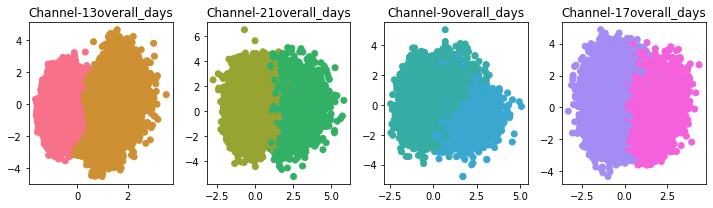

In [56]:
warnings.filterwarnings("ignore")

df = pca_channel(df, spike_cols, 'neuron_wavemap', channel_key,
                ['PCA1_overall', 'PCA2_overall'], neuron_color_dic_mouse1, plot=True, whiten=True,
                figsize=(10, 3))

## Stability and Aging analysis

We will base the below analysis on waveform features, firing dynamics, embeddings to quantify and visualize the stability of the device's recordings.

### Visualizing consistency of UMAP representation and waveforms

Here are visualizations shown in the lifespan recording paper. When rerunning the figures, there might be slight variations due to stochasticity in the umap calculation or even in cluster labelling attribution (the blue neuron in the paper might become the pink neuron in this visualization). Depending on the angle of view you've chosen the plot might appear to be a little bit different. It might also change depending on your choice of conditions.

In [57]:
from spike_stability.stability.embeddings import all_channels_over_time
from spike_stability.stability.waveforms import all_channel_waveforms_overtime
from spike_stability.util.dataset import postprocessing_dataset

In [59]:
color_dics = [all_color_dics['channel13mouse1']['wavemap_other'],
              all_color_dics['channel21mouse1']['wavemap_other'],
              all_color_dics['channel9mouse1']['wavemap_other'],
              all_color_dics['channel17mouse1']['wavemap_other']]

mean std[1.1634496 1.4527245]
avg shift mean[0.49534008 0.47173354]
result
avg shift / mean[0.42575122 0.32472334]
norm :0.5354524667319114
mean std[0.63509204 0.9796157 ]
avg shift mean[0.38945106 0.65811043]
result
avg shift / mean[0.61321988 0.6718047 ]
norm :0.9095934123807488
mean std[1.52209952 1.58741604]
avg shift mean[0.43953689 0.42418699]
result
avg shift / mean[0.28877014 0.26721854]
norm :0.39343860971812145
mean std[0.76608256 0.57457779]
avg shift mean[0.64387792 0.33359665]
result
avg shift / mean[0.8404811  0.58059441]
norm :1.0215176730575029
mean std[1.50553328 1.47261948]
avg shift mean[0.55853524 0.77681347]
result
avg shift / mean[0.37098831 0.52750455]
norm :0.6448979538318673
mean std[0.65357639 0.57862481]
avg shift mean[1.05578719 0.32975228]
result
avg shift / mean[1.61539982 0.56988964]
norm :1.7129771717137252
mean std[1.3075842  1.45152609]
avg shift mean[0.29513387 0.49965668]
result
avg shift / mean[0.22570926 0.34422852]
norm :0.4116284108330293
mean st

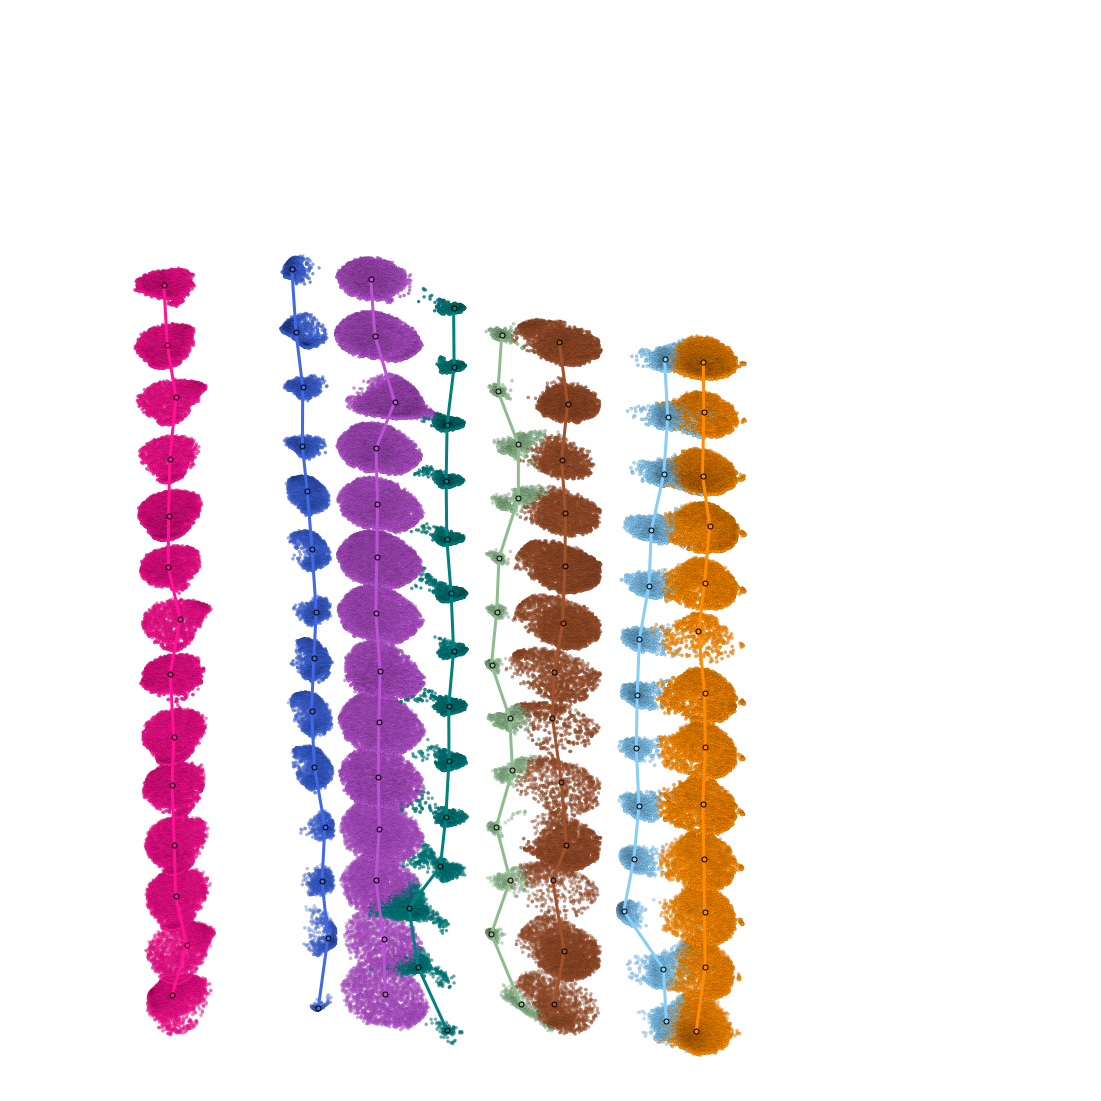

In [65]:
## Fig.4 panel a

det_cov, multi_dim_cv, all_neuron_shift, all_neuron_list = all_channels_over_time(df,
                                                    1,
                                                    'z',
                                                    color_dics,
                                                    savefig=False,
                                                    channel_key=channel_key,
                                                    date_key=date_key,
                                                    savefig_path='',
                                                    file_format='pdf',
                                                    cluster_key='cluster_wavemap',
                                                    neuron_key='neuron_wavemap',
                                                    coord_keys=['UMAP1_overall', 'UMAP2_overall'], 
                                                    labels=['UMAP 1', 'UMAP 2'],
                                                    displace=[0, 15, 22, 33],
                                                    include_points=True,
                                                    include_links=True,
                                                    azim = 270,
                                                    elev = 15,
                                                    dist = 7,
                                                    figsize=(30, 20),
                                                    animate=False,
                                                    verbose=0,
                                                    date_correction=4,
                                                    postprocess=True,
                                                    nb_points=10000,
                                                    distance=4,
                                                    anim_save_path='')

In [67]:
# Keep only highest quality spikes in subsequent analysis
df_postprocess = postprocessing_dataset(df, 1, 10000, 4,
                                        date_key=date_key,
                                       neuron_key='neuron_wavemap',
                                       coord_keys=['UMAP1_overall', 'UMAP2_overall'])

### Waveforms over time

In [77]:
df_postprocess['channel'] = df_postprocess['channel'].astype('int')
df_postprocess['neuron_wavemap'] = df_postprocess['neuron_wavemap'].astype('int')
df_postprocess['cluster_wavemap'] = df_postprocess['cluster_wavemap'].astype('int')

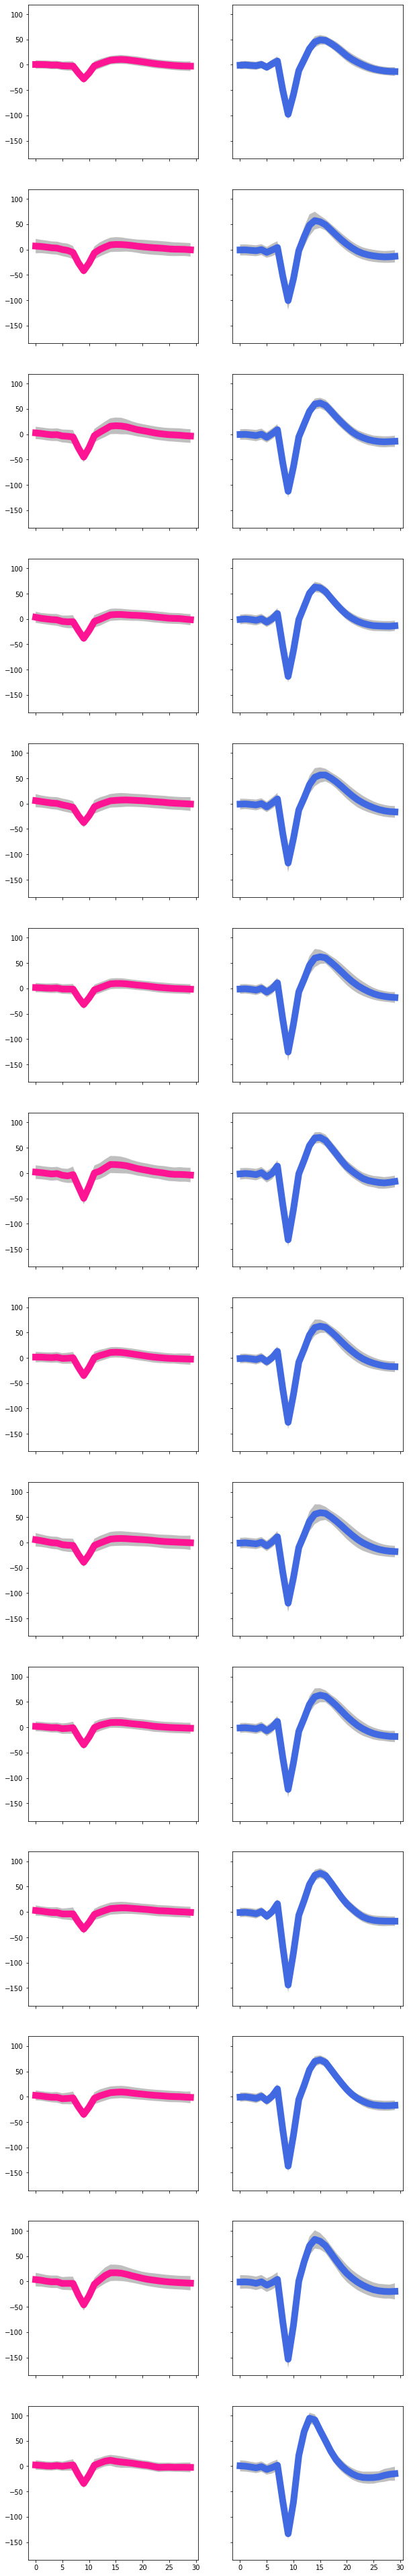

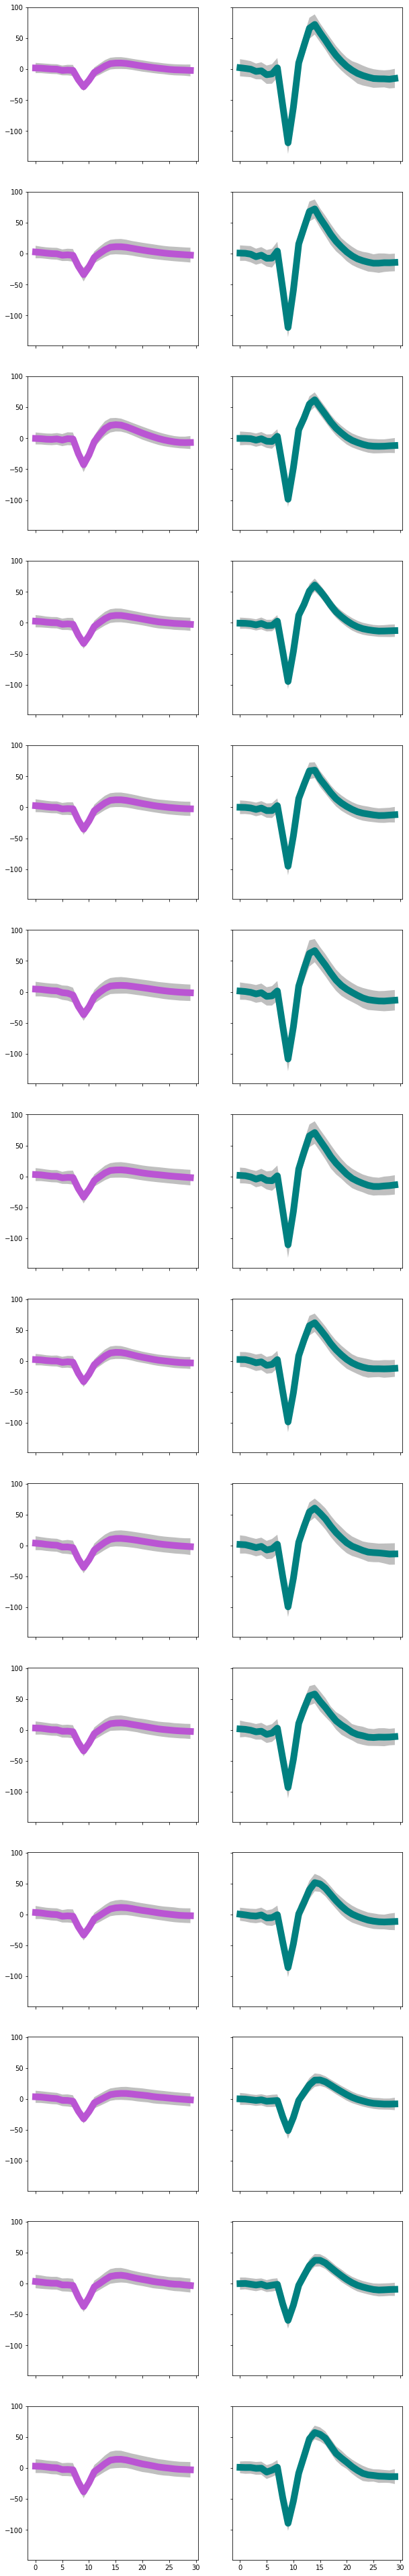

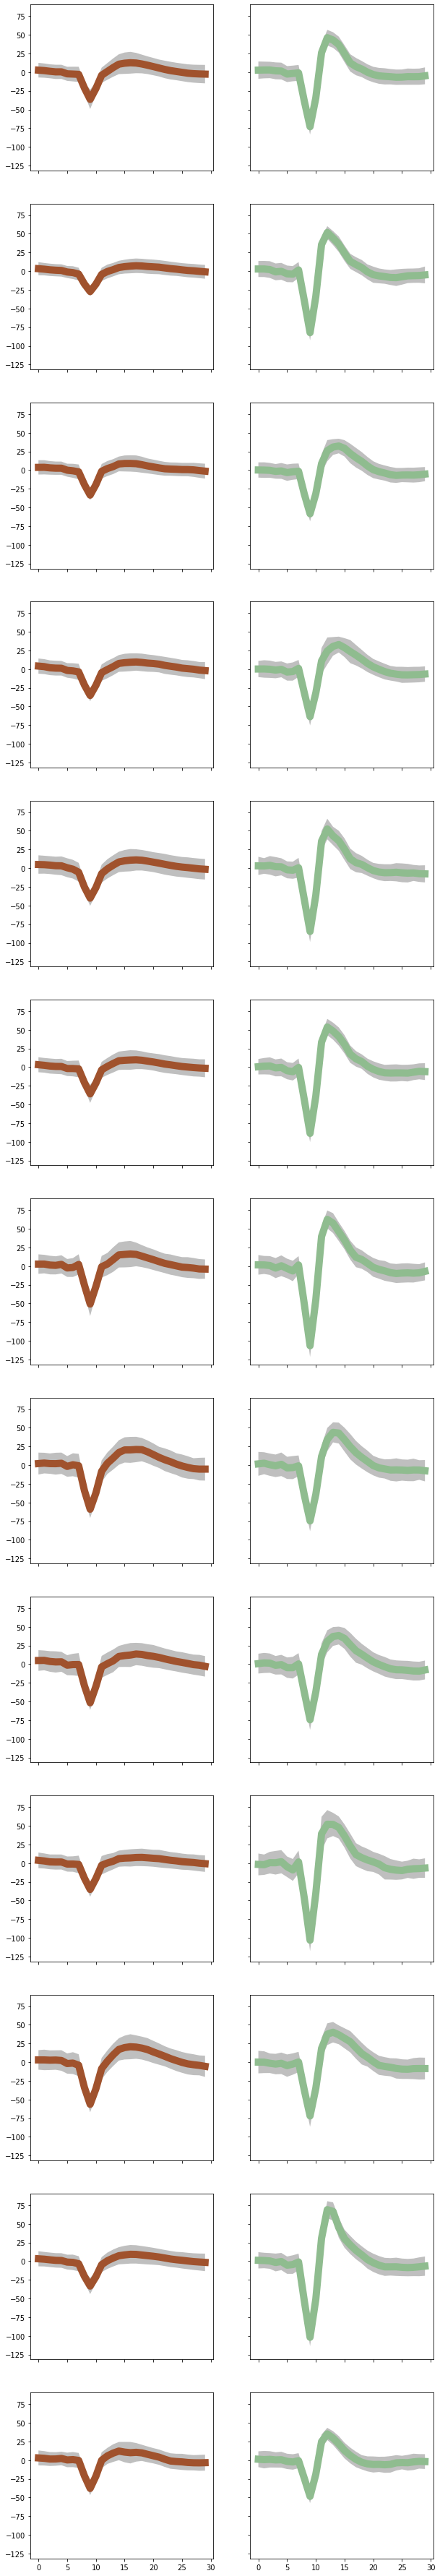

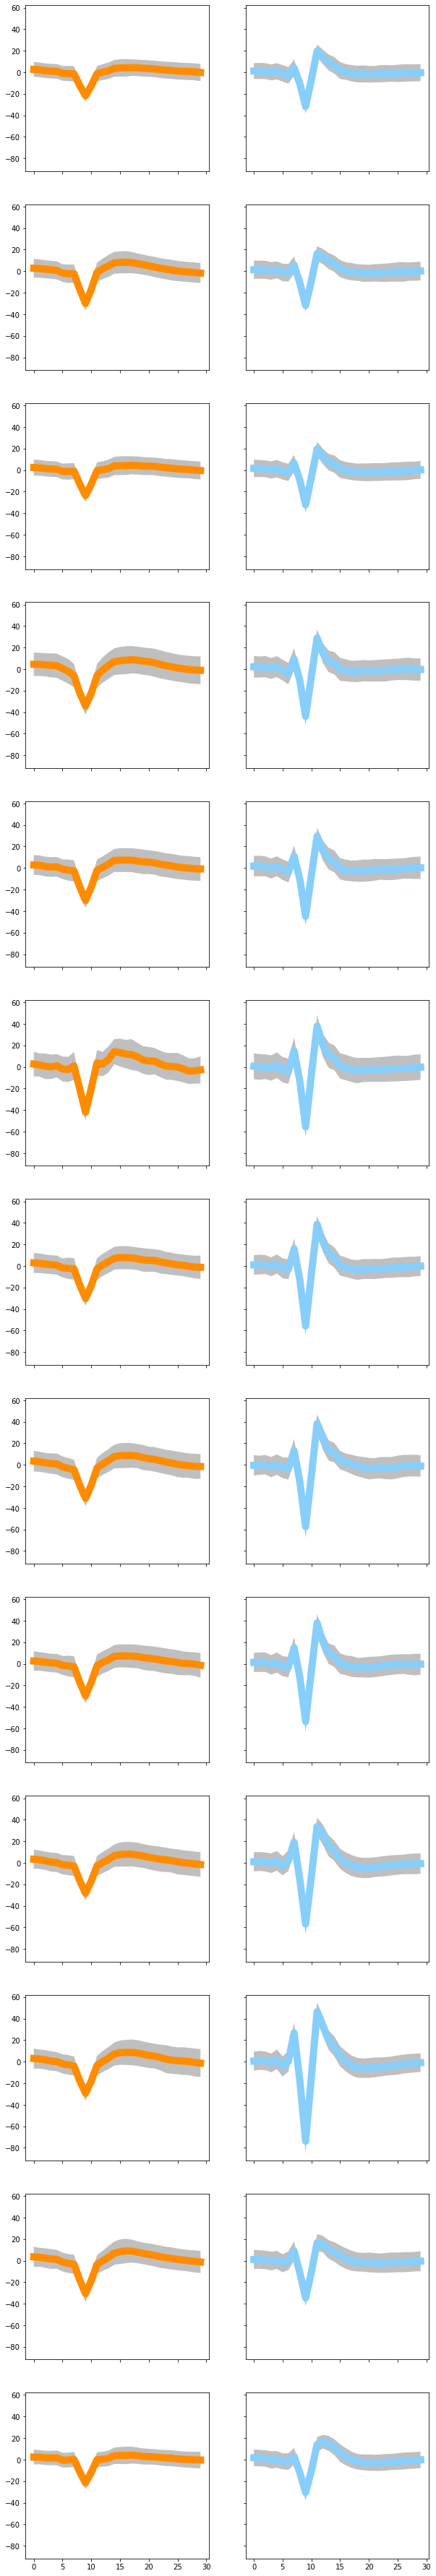

In [78]:
## Fig.4 panel b - to reproduce exactly you need to fix y scale
all_channel_waveforms_overtime(df_postprocess,
                               1,
                               'cluster_wavemap',
                                channel_key,
                                date_key,
                                spike_cols,
                                all_color_dics,
                                savefig=False,
                                color_key='wavemap_other',
                                savefig_basepath='',
                                title=False,
                                borders=True)

### PCA representation over time

mean std[0.29653056 0.78284646]
avg shift mean[0.17061828 0.19556403]
result
avg shift / mean[0.57538179 0.24981148]
norm :0.6272718554636207
mean std[0.30767062 1.00894189]
avg shift mean[0.20025075 0.70550481]
result
avg shift / mean[0.65086081 0.69925217]
norm :0.9552870759898245
mean std[0.51567352 0.95011647]
avg shift mean[0.16620199 0.11455678]
result
avg shift / mean[0.3223008 0.1205713]
norm :0.3441151646168955
mean std[0.60700324 1.1928644 ]
avg shift mean[0.38848081 0.30321869]
result
avg shift / mean[0.63999793 0.25419377]
norm :0.6886303915135265
mean std[0.64781341 0.93785331]
avg shift mean[0.29598574 0.39986187]
result
avg shift / mean[0.45689968 0.42635864]
norm :0.6249312023952289
mean std[0.52183621 0.89591626]
avg shift mean[0.71455103 0.56255544]
result
avg shift / mean[1.36930135 0.62791074]
norm :1.506405687878521
mean std[0.53707632 1.03607538]
avg shift mean[0.13651298 0.3343473 ]
result
avg shift / mean[0.25417798 0.32270558]
norm :0.41078624286770055
mean std

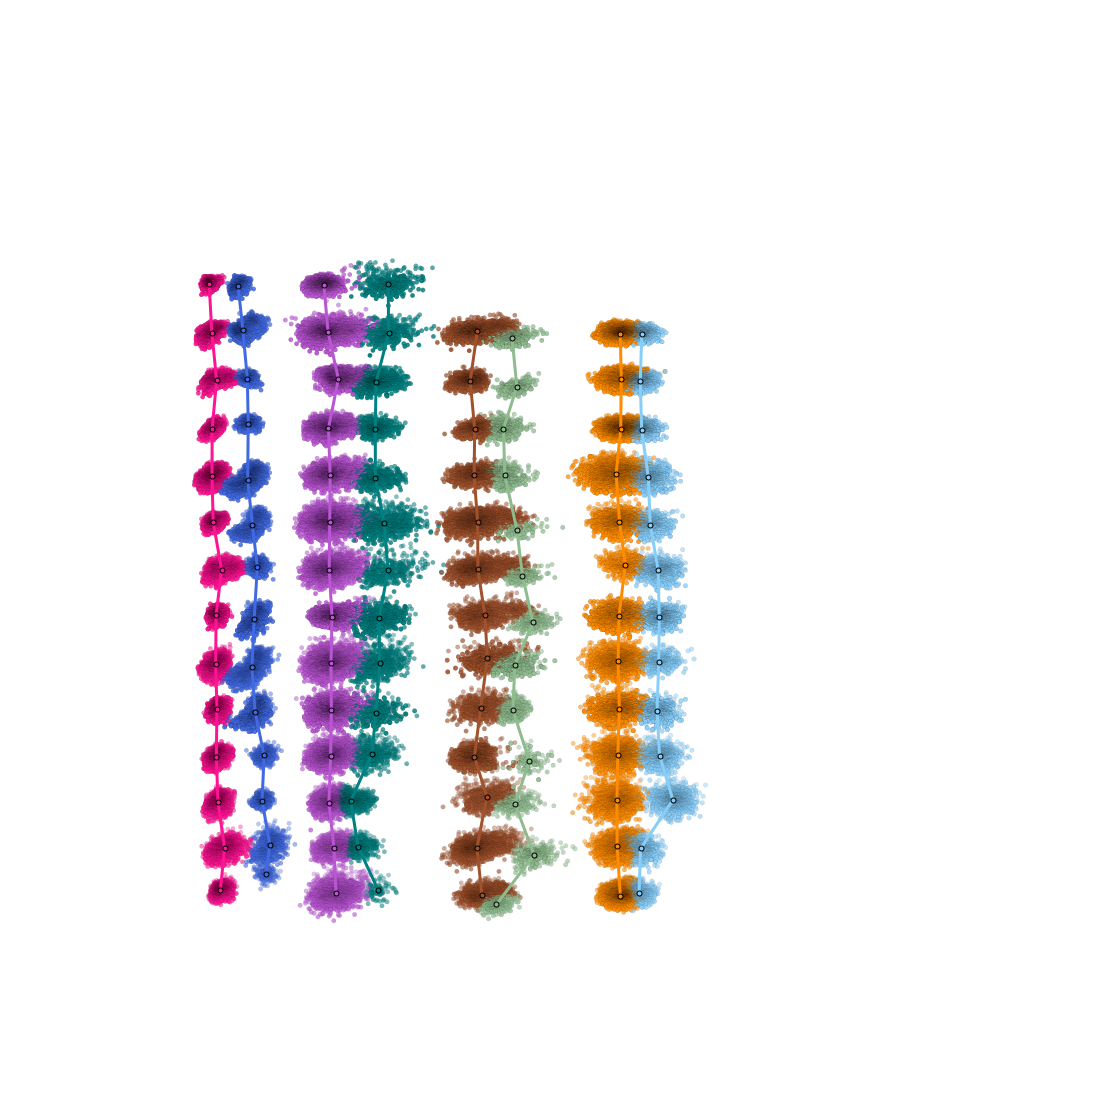

In [80]:
## Extended Data Fig. 6 panel b - angle might change output a bit
det_cov, multi_dim_cv, all_neuron_shift, all_neuron_list = all_channels_over_time(df,
                                         1,
                                         'z',
                                         color_dics,
                                         savefig=True,
                                         savefig_path='wavemap_over_time_v1.jpg',
                                         file_format='jpg',
                                         cluster_key='cluster_wavemap',
                                         neuron_key='neuron_wavemap',
                                         coord_keys=['PCA1_overall', 'PCA2_overall'],
                                         labels=['PC 1', 'PC 2'],
                                         displace=[0, 6, 14, 22],
                                         azim = 270,
                                         elev = 15,
                                         dist = 8,
                                         figsize=(30, 20),
                                         include_points=True,
                                         include_links=True,
                                         animate=False,
                                         postprocess=False,
                                         date_correction=4,
                                         dot_size=20.,
                                         lw=0.1,
                                         nb_points=10000,
                                         distance=2,
                                         anim_save_path='')

### Waveform auto (& cross-) correlation

Tha package can be used to calculate auto (and cross) correlation between average neuron waveforms. This information can be used to produce boxplots, autocorrelation over time, histograms of auto and cross correlation...

You can choose to work with plotting functions that plot a figure and return the dataframes or just obtain the dataframes to save to csv and plot using a different style/software.
Make sure to define the combinations you want to test for cross correlation. With mesh electronics for example, you only want to compare waveforms from the same channel as you know that no single neuron can be recorded on two separate channels.

**Note: depending on your use case, you might want to be using df, or df_postprocess. For demonstration purposes we use both here but df_postprocess should be used to reproduce paper figures.**

In [81]:
from spike_stability.stability.waveforms import correlation_plot
from spike_stability.util.colors import create_neuron_color_dict
from spike_stability.stability.waveforms import autocorrelation_plot
from spike_stability.stability.waveforms import correlations

In [82]:
neuron_color_dic_mouse1 = create_neuron_color_dict('husl', df['neuron_wavemap'].unique())

No handles with labels found to put in legend.
No handles with labels found to put in legend.


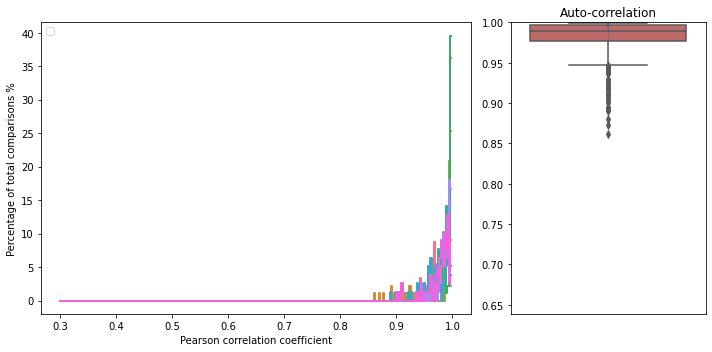

In [85]:
df_plot_autocorr, df_plot_crosscorr = correlation_plot(df=df_postprocess,
                                                     mouse=1,
                                                     neuron_key='neuron_wavemap',
                                                     neuron_color_dic=neuron_color_dic_mouse1,
                                                     spike_cols=spike_cols,
                                                     savefig=False,
                                                     combs=[(0,1), (0,2), (1,2), (3, 4), (5, 6), (7, 8)],
                                                     savefigpath='',
                                                     stat="pearsonr",
                                                     date_key=date_key)

#if you just want values 
# df_plot_autocorr, df_plot_crosscorr = correlations(df=df, mouse=1, neuron_key="", spike_cols, combs)

(0.5, 1.0)

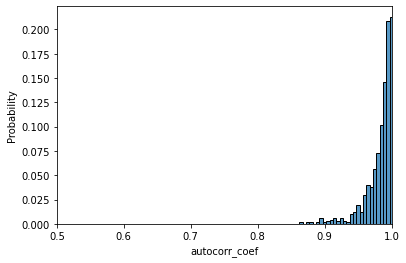

In [86]:
## Similar to Fig. 4 panel c - note that this is for only one mouse, results for all three were put together to
# obtain panel

#work directly on the ax object if you wish to change labels, change the color etc..
ax = autocorrelation_plot(df_plot_autocorr, 'autocorr_coef', binwidth=0.005,
                     stat='probability', savefig_path=None)
ax.set_xlim(0.5, 1)

In [70]:
#if you wish to save the csvs to use later
#df_plot_autocorr.to_csv('your_path_here')
#df_plot_crosscorr.to_csv('your_path_here')

### ISI distributions as a function of time

You can either just plot the ISI distributions over time or fit an exponential decay model to the ISI distribution for each cluster and timepoint. The fitting yields a firing parameter which can be used to give a statistic results over all ISI distributions.

In [87]:
from spike_stability.stability.isi import isi_distribution_plot, isi_distribution_fit 

In [93]:
color_maps_dict = {'0': 'Reds',
 '1': 'Blues',
 '2': 'Blues',
 '3': 'Purples',
 '4': 'Greens',
 '5': 'RdPu',
 '6': 'GnBu',
 '7': 'cool',
 '8': 'Oranges'}

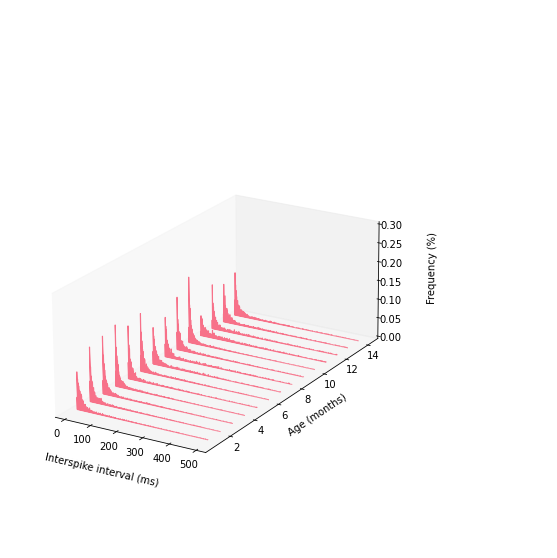

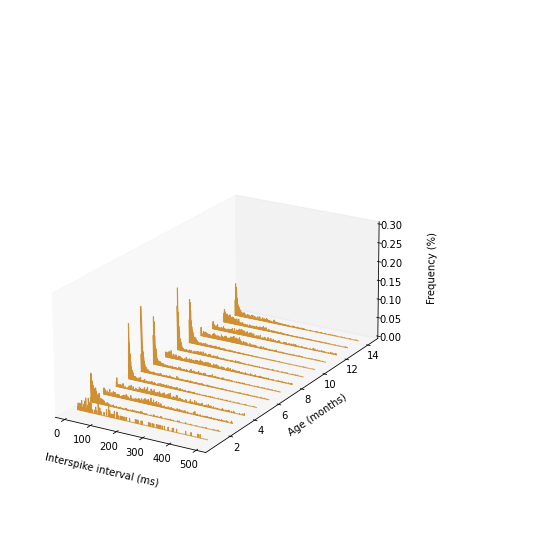

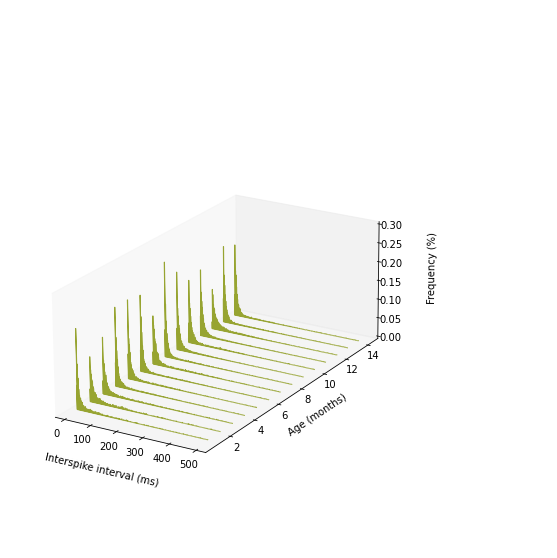

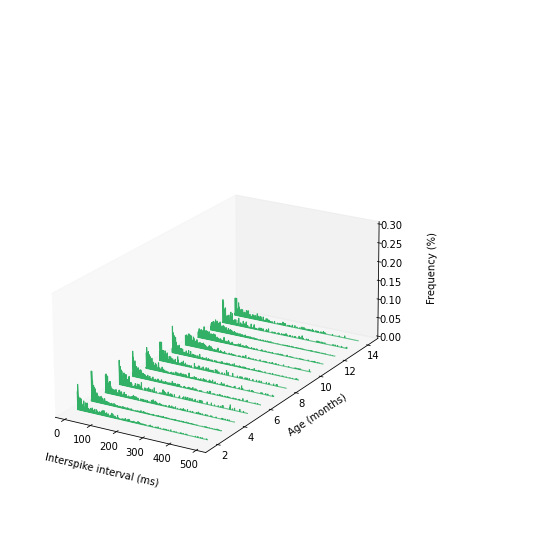

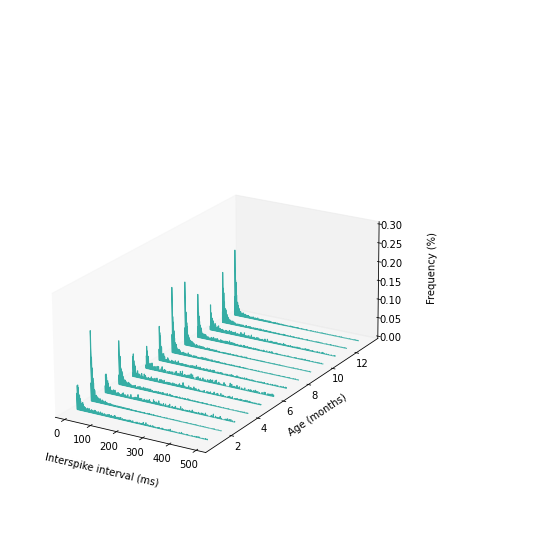

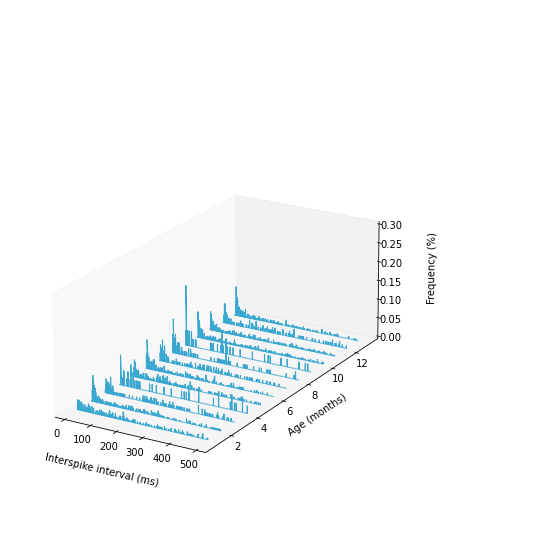

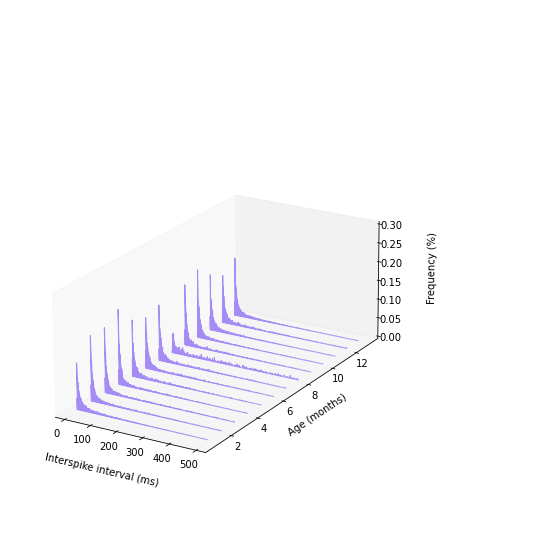

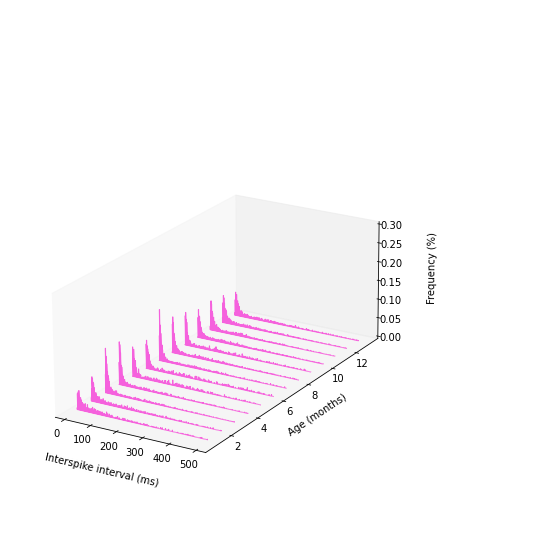

In [95]:
## Extended Data Fig. 6 c - beware of colors being set appropriately above
isi_distribution, df_isi = isi_distribution_plot(df_postprocess,
                                         1,
                                         color_maps_dict,
                                         neuron_color_dic_mouse1,
                                         method="wavemap",
                                         cluster_key='neuron_wavemap',
                                         savefig_path='',
                                         savefig=False,
                                         bar_width=1.,
                                         nb_bins=250,
                                         zlim=0.3,
                                         display=True,
                                         correct_date=False,
                                         date_key=date_key,
                                         min_spikes=100,
                                         timestamp_key='timestamps')

In [96]:
df_isi.head()
#save results
#df_isi.to_csv('your_path_to_isi_csv_here')

isi  neuron_wavemap  date
0  14.7               0   1.0
1   5.2               0   1.0
2  11.8               0   1.0
3  14.3               0   1.0
4  42.6               0   1.0

### Conclusion

Here we have presented some of the major functions of the package. Of course, this notebook is far from exhaustive and there are many more functions in the package which have not been highlighted here. A quick read through the scripts in each submodule should alert the reader to which functions are necessary to produce other plots.